In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import h5py as h5
import pandas as pd

#importing glob for filepaths
import glob

# Reading the data for plotting

In [2]:
# getting the file paths for snap = 15-28 hdf5 files
f_15 = glob.glob("fine/HighRes/*s15_752.hdf5")
f_16 = glob.glob("fine/HighRes/*s16_752.hdf5")
f_17 = glob.glob("fine/HighRes/*s17_752.hdf5")
f_18 = glob.glob("fine/HighRes/*s18_752.hdf5")
f_19 = glob.glob("fine/HighRes/*s19_752.hdf5")
f_20 = glob.glob("fine/HighRes/*s20_752.hdf5")
f_21 = glob.glob("fine/HighRes/*s21_752.hdf5")
f_22 = glob.glob("fine/HighRes/*s22_752.hdf5")
f_23 = glob.glob("fine/HighRes/*s23_752.hdf5")
f_24 = glob.glob("fine/HighRes/*s24_752.hdf5")
f_25 = glob.glob("fine/HighRes/*s25_752.hdf5")
f_26 = glob.glob("fine/HighRes/*s26_752.hdf5")
f_27 = glob.glob("fine/HighRes/*s27_752.hdf5")
f_28 = glob.glob("fine/HighRes/*s28_752.hdf5")

In [3]:
f = h5.File(f_15[0], 'r')
print(f.keys())
f.close()

<KeysViewHDF5 ['2pCF', 'CC', 'Pk']>


In [4]:
## reading DM, Gas and All Matter 2pCF from the files

# Arrays to save the data
Master_2pCF = []
# Master_CC   = []

for z_path in (f_15, f_16, f_17, f_18, f_19, f_20, f_21, f_22, f_23, f_24, f_25, f_26, f_27, f_28):
    DM = []; Gas = []; All = []; CC = []
    for name in z_path:
        f = h5.File(name, 'r')
        DM.append([f['2pCF']['DM']['r'][:], f['2pCF']['DM']['xi0'][:]])
        Gas.append([f['2pCF']['gas']['r'][:], f['2pCF']['gas']['xi0'][:]])
        All.append([f['2pCF']['all_matter']['r'][:], f['2pCF']['all_matter']['xi0'][:]])
        # CC.append([f['CC']['BH-Gas']['r'][:], f['CC']['BH-Gas']['xi0'][:]])
        f.close()
        
    # concatenating the data
    Master_2pCF.append([DM, Gas, All])
    # Master_CC.append(CC)

In [5]:
## Reading DM, Gas and All Matter Power Spectrum from the files
# Arrays to save the data
Master_Pk = []

for z_path in (f_15, f_16, f_17, f_18, f_19, f_20, f_21, f_22, f_23, f_24, f_25, f_26, f_27, f_28):
    DM = []; Gas = []; All = []
    for name in z_path:
        f = h5.File(name, 'r')
        DM.append( [f['Pk']['DM']['k'][:], f['Pk']['DM']['Pk0'][:]])
        Gas.append([f['Pk']['gas']['k'][:], f['Pk']['gas']['Pk0'][:]])
        All.append([f['Pk']['all_matter']['k'][:], f['Pk']['all_matter']['Pk0'][:]])
        f.close()
    Master_Pk.append([DM, Gas, All])

In [6]:
np.asarray(Master_2pCF, dtype=object).shape

(14, 3, 2, 2)

In [7]:
# array of z_vals
z_vals = [2.012, 1.74, 1.49, 1.26, 1.0, 0.87, 0.74, 0.62, 0.5, 0.37, 0.27, 0.18, 0.1, 0.0]

In [8]:
# computing hard cutoff xlimits
box_size = 50
h = 0.6777

h1 = (h*box_size)/10
h2 = 2*np.pi/h1

We also load the data for refernnce model of Eagle. Since there is no 50Mpc Ref model, we use the Ref model with 100Mpc box size and 1024 particles on each side

In [9]:
ref_f = h5.File('coarse/Ref100_s28_1024.hdf5',"r")
ref_cf = ref_f['2pCF']  # 2pCF group
ref_pk = ref_f['Pk']    # Pk group
# ref_f.close()

# Plotting the loaded data

There will be one master figure with 3 subplots corresponding to different ranges of z, which are as follows:  
subplot 1: z = 2.012 - 1  
subplot 2: z = 1.8 - 0.5  
subplot 3: z = 0.5 - 0.0


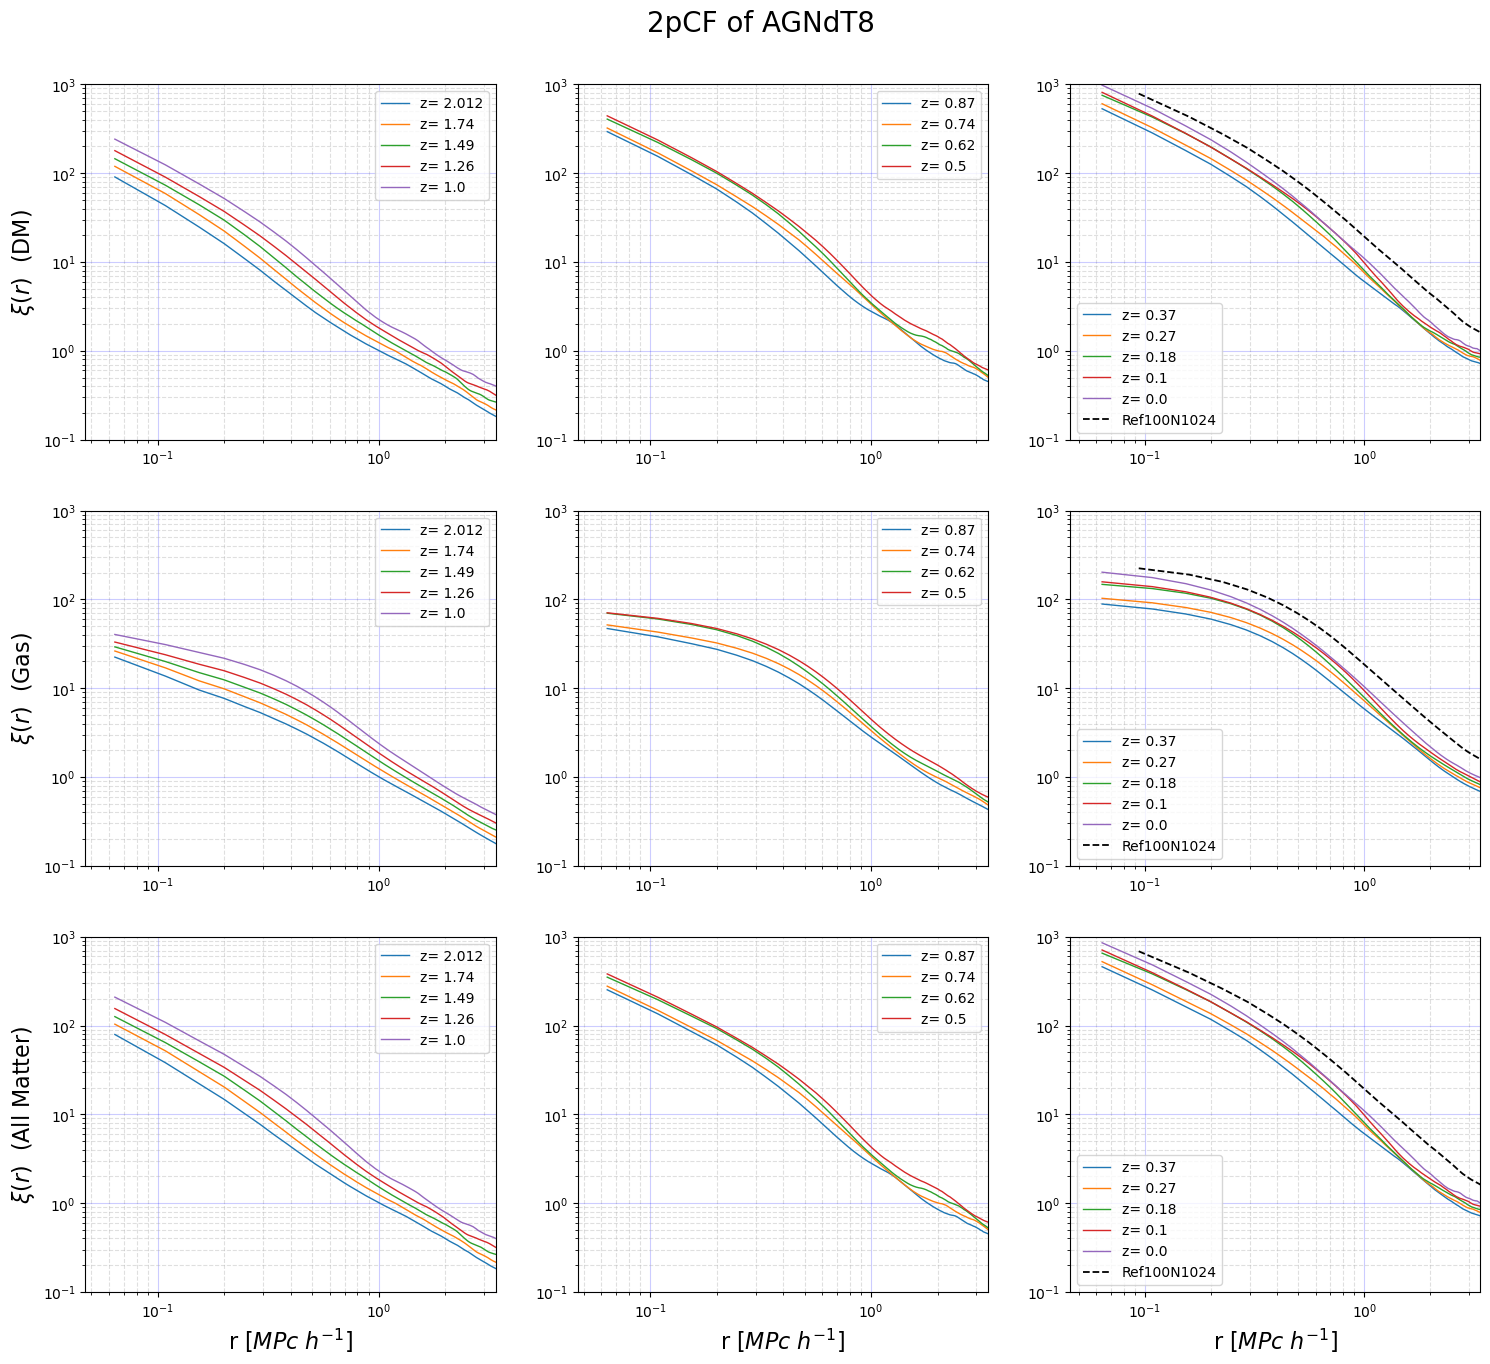

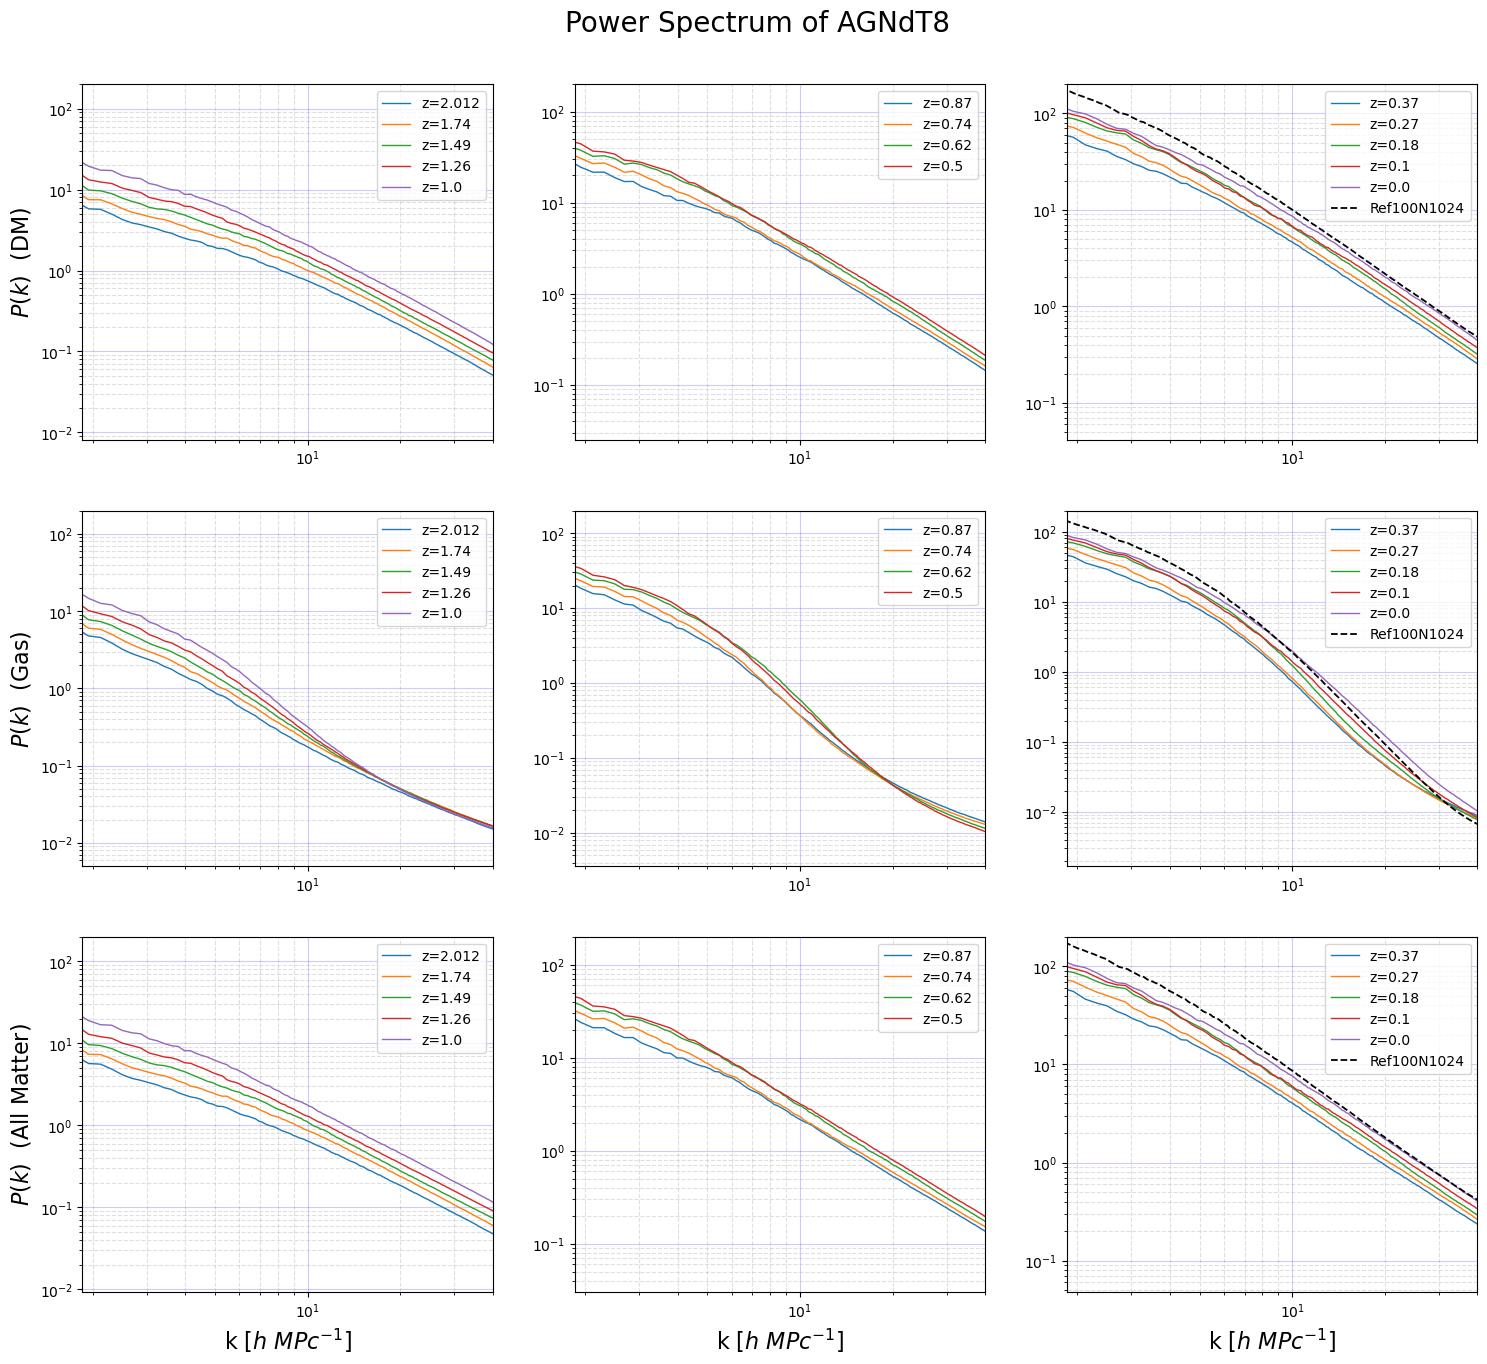

In [10]:
# breakpoints corresponding to above intervals
breakpoints = [5, 9, 14]
y_labels = ["(DM)", "(Gas)", "(All Matter)"]
keys = ["DM", "gas", "all_matter"] #keys array for easy access of data

fig, ax = plt.subplots(3,3, figsize=(18,15), dpi=100)

for c in range(3):
    last_break = 0
    ax[c,0].set_ylabel('$\\xi(r)$  '+y_labels[c], fontsize=16)
    for i in enumerate(breakpoints):
        # iterating over the Master_2pCF array with the breakpoints
        for j in range(last_break, i[1]):
            ax[c, i[0]].loglog(Master_2pCF[j][c][0][0], Master_2pCF[j][c][0][1], lw=1, label='z= '+str(z_vals[j]))
        # plotting the reference data
        if i[0]==2:
            ax[c,i[0]].loglog(ref_cf[keys[c]]['r'][:], ref_cf[keys[c]]['xi0'][:], lw=1.3, color='black', ls='--', label="Ref100N1024")
        ax[c,i[0]].set_xlim(right= h1)
        ax[c,i[0]].set_ylim((1e-1), (1e3))
        ax[c,i[0]].grid(alpha=0.2, color='blue')
        ax[c,i[0]].grid(alpha=0.4, which='minor', linestyle='--')
        ax[c,i[0]].legend()
        last_break = i[1]
        if c==2:
            ax[c,i[0]].set_xlabel('r [$MPc~h^{-1}$]', fontsize=16)
fig.suptitle('2pCF of AGNdT8', fontsize=20);
fig.subplots_adjust(top=0.93)
# plt.savefig("Plots/AGNdT8_2pCF.jpg", bbox_inches='tight', dpi=300)


# now plotting power spectrum
fig, ax = plt.subplots(3,3, figsize=(18,15), dpi=100)
for c in range(3):
    last_break = 0
    ax[c,0].set_ylabel('$P(k)$  '+y_labels[c], fontsize=16)
    for i in enumerate(breakpoints):
        # iterating over the Master_2pCF array with the breakpoints
        for j in range(last_break, i[1]):
            ax[c, i[0]].loglog(Master_Pk[j][c][0][0][:-2], Master_Pk[j][c][0][1][:-2], lw=1, label='z='+str(z_vals[j]))
        # plotting the reference data
        if i[0]==2:
            ax[c,i[0]].loglog(ref_pk[keys[c]]['k'][:], ref_pk[keys[c]]['Pk0'][:], lw=1.3, color='black', ls='--', label="Ref100N1024")
        ax[c,i[0]].set_xlim(left= h2, right=40)
        ax[c,i[0]].set_ylim(top=(200))
        ax[c,i[0]].legend()
        ax[c,i[0]].grid(alpha=0.2, color='blue')
        ax[c,i[0]].grid(alpha=0.4, which='minor', linestyle='--')
        last_break = i[1]
        if c==2:
            ax[c,i[0]].set_xlabel('k [$h~MPc^{-1}$]', fontsize=16)
fig.suptitle('Power Spectrum of AGNdT8', fontsize=20);
fig.subplots_adjust(top=0.93)
# plt.savefig("Plots/AGNdT8_Pk.jpg", bbox_inches='tight', dpi=300)

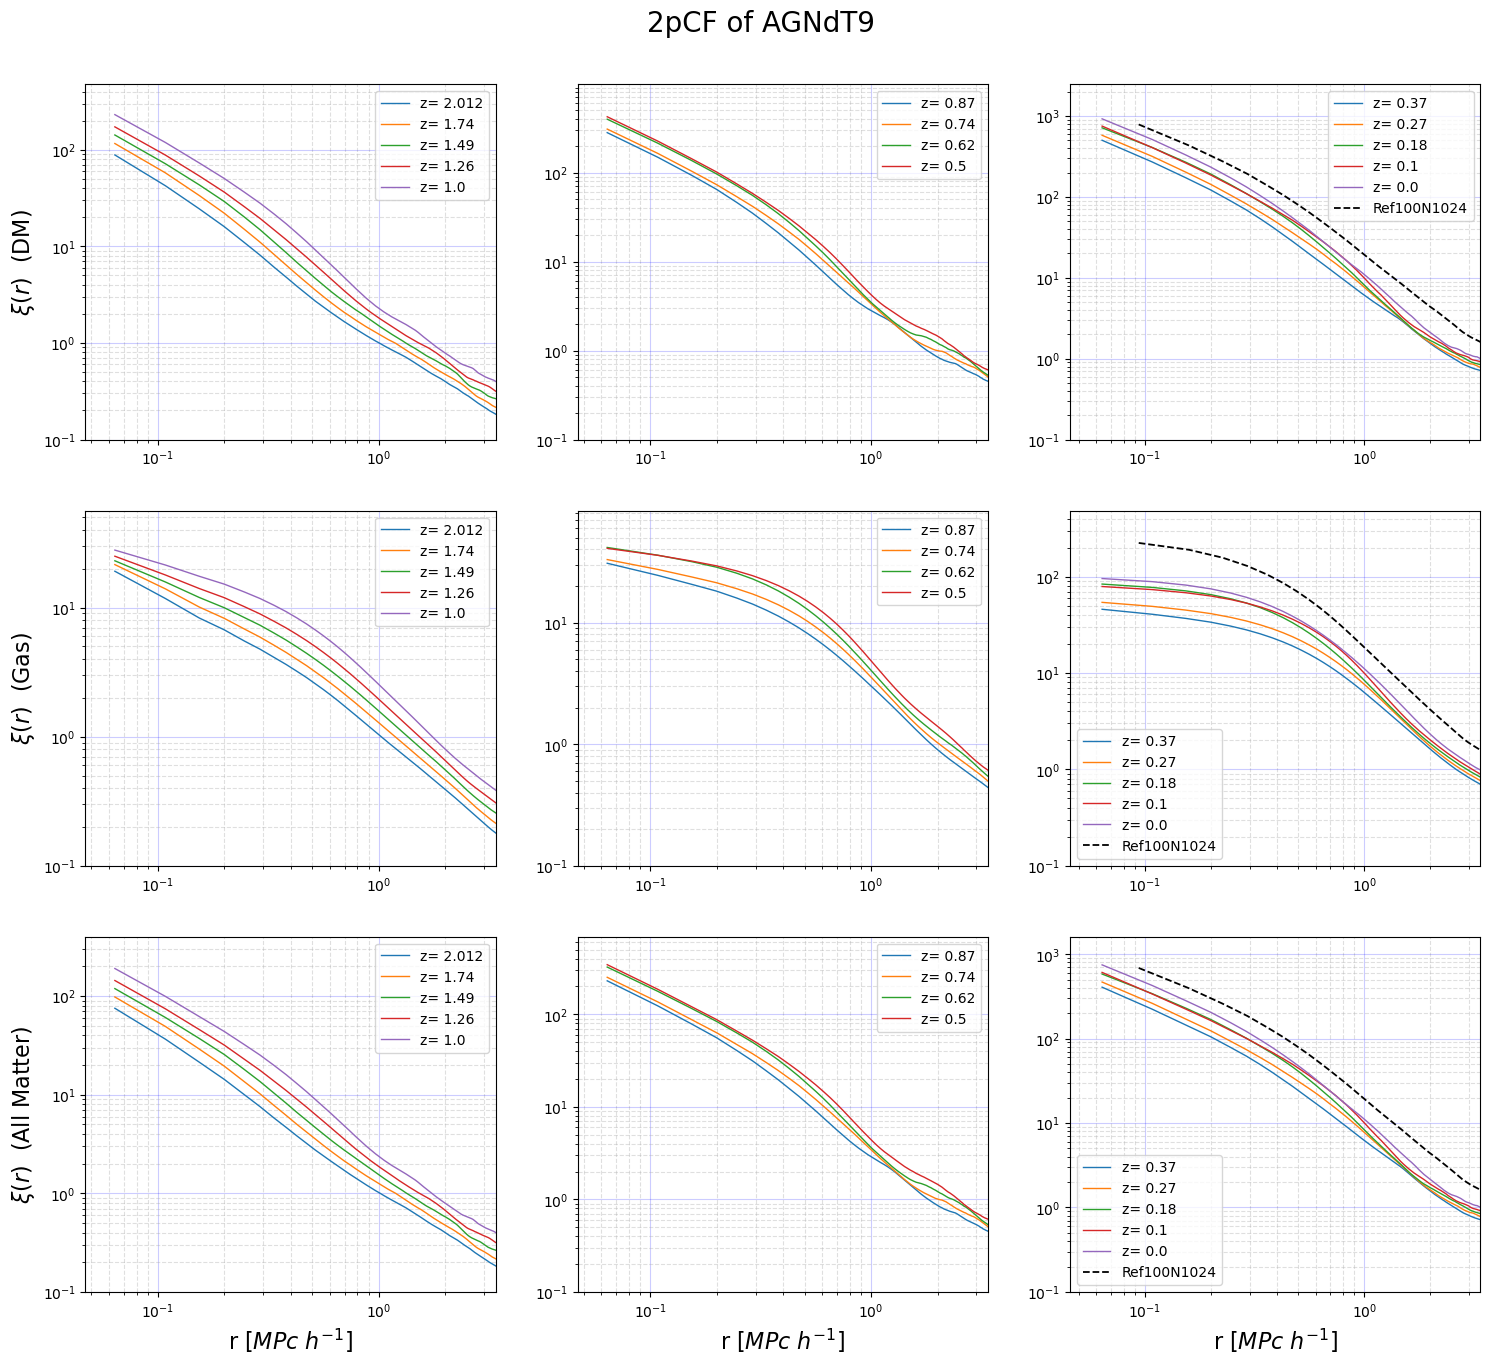

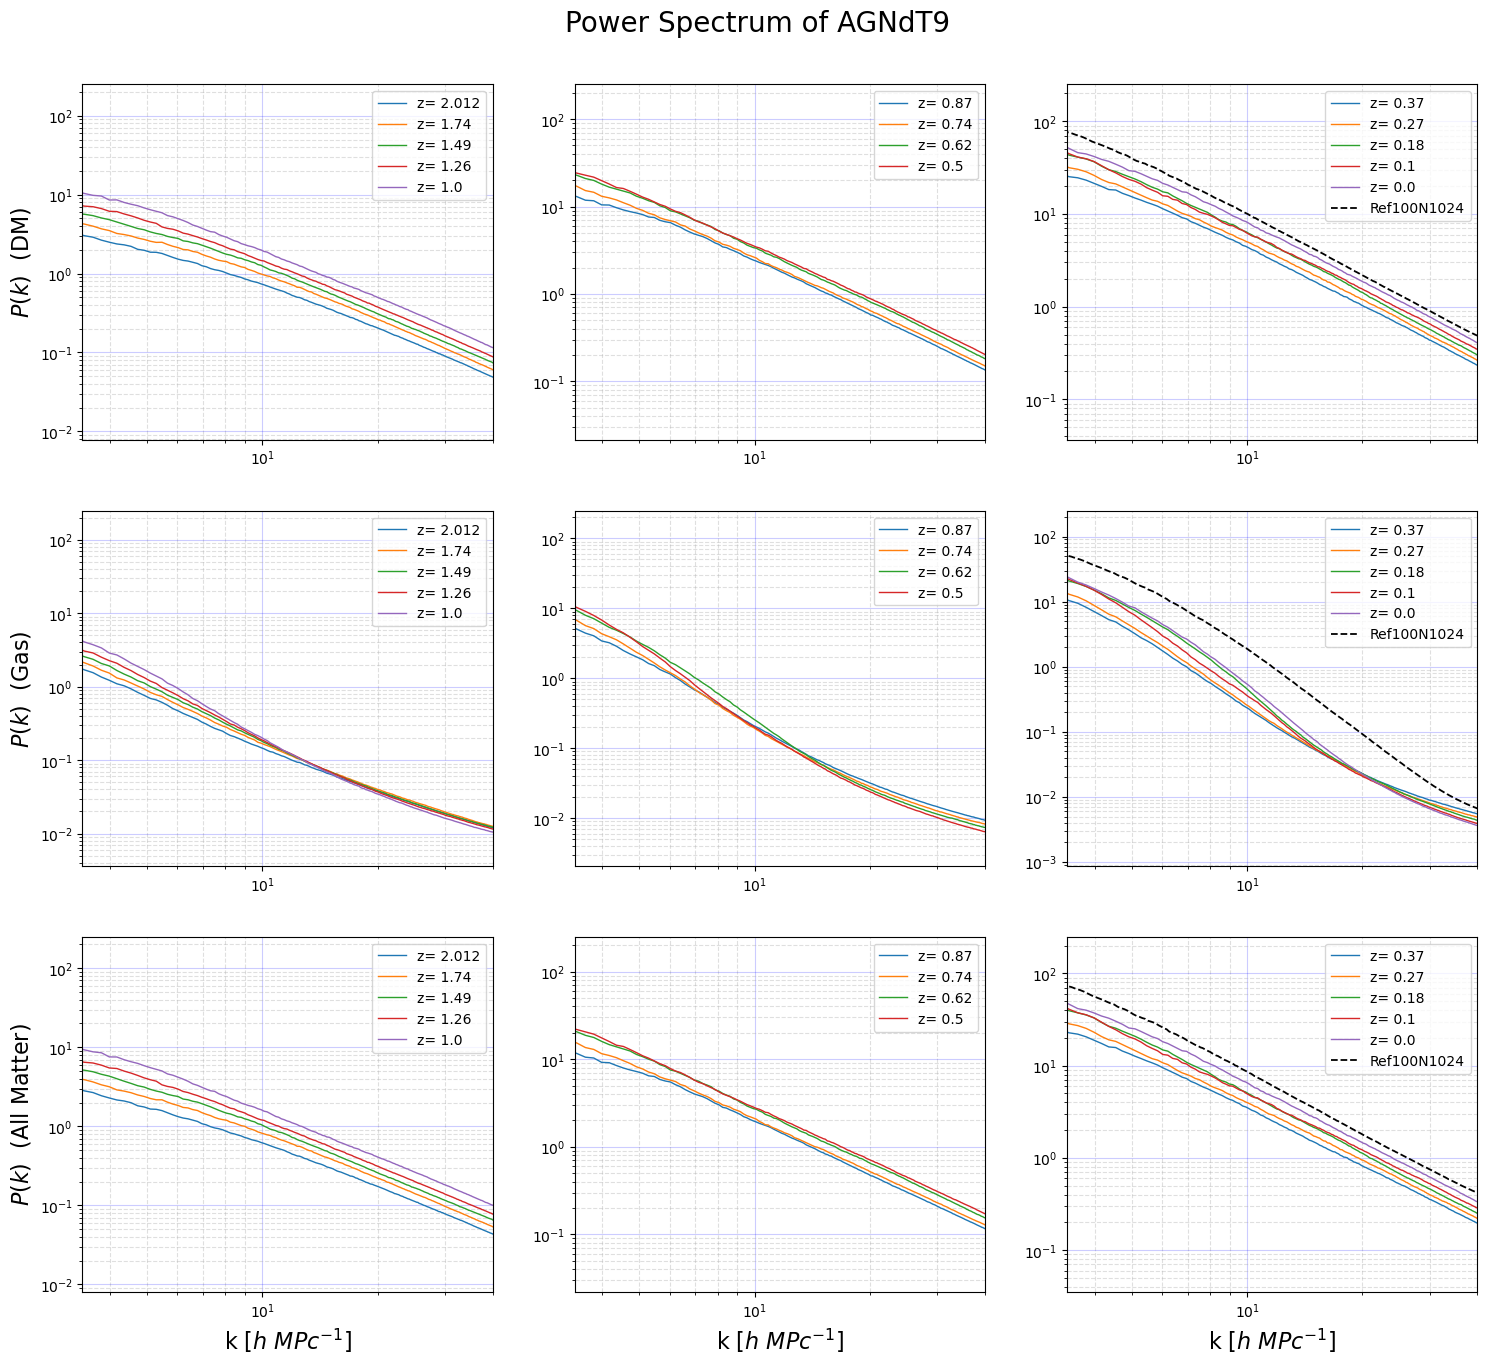

In [11]:
# breakpoints corresponding to above intervals
breakpoints = [5, 9, 14]
y_labels = ["(DM)", "(Gas)", "(All Matter)"]

fig, ax = plt.subplots(3,3, figsize=(18,15), dpi=100)

for c in range(3):
    last_break = 0
    ax[c,0].set_ylabel('$\\xi(r)$  '+y_labels[c], fontsize=16)
    for i in enumerate(breakpoints):
        # iterating over the Master_2pCF array with the breakpoints
        for j in range(last_break, i[1]):
            ax[c, i[0]].loglog(Master_2pCF[j][c][1][0], Master_2pCF[j][c][1][1], lw=1, label='z= '+str(z_vals[j]))
        # plotting the reference data
        if i[0]==2:
            ax[c,i[0]].loglog(ref_cf[keys[c]]['r'][:], ref_cf[keys[c]]['xi0'][:], lw=1.3, color='black', ls='--', label="Ref100N1024")
        ax[c,i[0]].set_xlim(right=h1)
        ax[c,i[0]].set_ylim(bottom=(1e-1))
        ax[c,i[0]].legend()
        ax[c,i[0]].grid(alpha=0.2, color='blue')
        ax[c,i[0]].grid(alpha=0.4, which='minor', linestyle='--')
        last_break = i[1]
        if c==2:
            ax[c,i[0]].set_xlabel('r [$MPc~h^{-1}$]', fontsize=16)
fig.suptitle('2pCF of AGNdT9', fontsize=20);
fig.subplots_adjust(top=0.93)
# plt.savefig("Plots/AGNdT9_2pCF.jpg", bbox_inches='tight', dpi=300)


# now plotting power spectrum
fig, ax = plt.subplots(3,3, figsize=(18,15), dpi=100)
for c in range(3):
    last_break = 0
    ax[c,0].set_ylabel('$P(k)$  '+y_labels[c], fontsize=16)
    for i in enumerate(breakpoints):
        # iterating over the Master_2pCF array with the breakpoints
        for j in range(last_break, i[1]):
            ax[c, i[0]].loglog(Master_Pk[j][c][1][0][:-2], Master_Pk[j][c][1][1][:-2], lw=1, label='z= '+str(z_vals[j]))
        # plotting the reference data
        if i[0]==2:
            ax[c,i[0]].loglog(ref_pk[keys[c]]['k'][:], ref_pk[keys[c]]['Pk0'][:], lw=1.3, color='black', ls='--', label="Ref100N1024")
        ax[c,i[0]].set_xlim(left= h1, right=40)
        ax[c,i[0]].set_ylim(top = (1e3)/4)
        ax[c,i[0]].legend()
        ax[c,i[0]].grid(alpha=0.2, color='blue')
        ax[c,i[0]].grid(alpha=0.4, which='minor', linestyle='--')
        last_break = i[1]
        if c==2:
            ax[c,i[0]].set_xlabel('k [$h~MPc^{-1}$]', fontsize=16)
fig.suptitle('Power Spectrum of AGNdT9', fontsize=20);
fig.subplots_adjust(top=0.93)
# plt.savefig("Plots/AGNdT9_Pk.jpg", bbox_inches='tight', dpi=300)

In [12]:
# reading Eagel DM only data
f_ref_dm = h5.File('coarse/DMONLYN1504_s28_1024.hdf5',"r") # reading Dark matter only Run
# f_ref1= h5.File('Pk_TNG.hdf5',"r")
f_ref_dm.keys()
ref_cf_dm = f_ref_dm['2pCF']['DM']
ref_pk_dm = f_ref_dm['Pk']['DM']

f.close()

In [13]:
# reading horizon data
h_AGN= pd.read_csv('Hz-AGN_powerspec.out', delim_whitespace=True, header=None, index_col=None, usecols=[0,1])
h_dm = pd.read_csv('Hz-DM_powerspec.out', delim_whitespace=True, header=None, index_col=None, usecols=[0,1])

# getting the horizon data
h_k_ref   = h_AGN.iloc[:,0].values
h_del_ref = h_AGN.iloc[:,1].values

h_del_ref_dm = h_dm.iloc[:,1].values

# converting Delta to Pk
h_Pk_ref    = (h_del_ref/h_k_ref**3)*(np.pi**2)*2
h_Pk_ref_dm = (h_del_ref_dm/h_k_ref**3)*(np.pi**2)*2

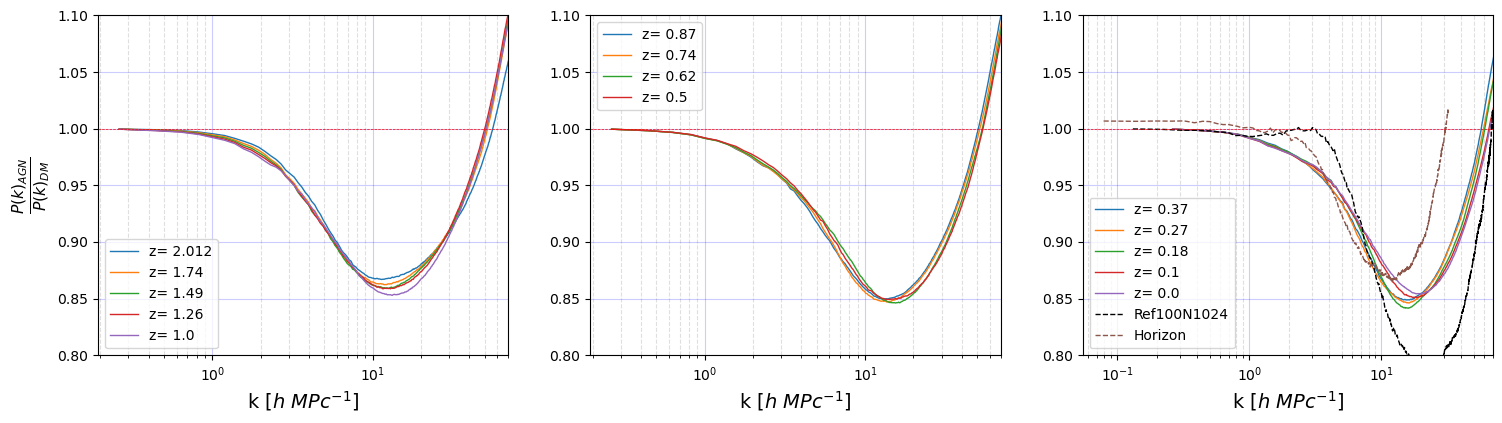

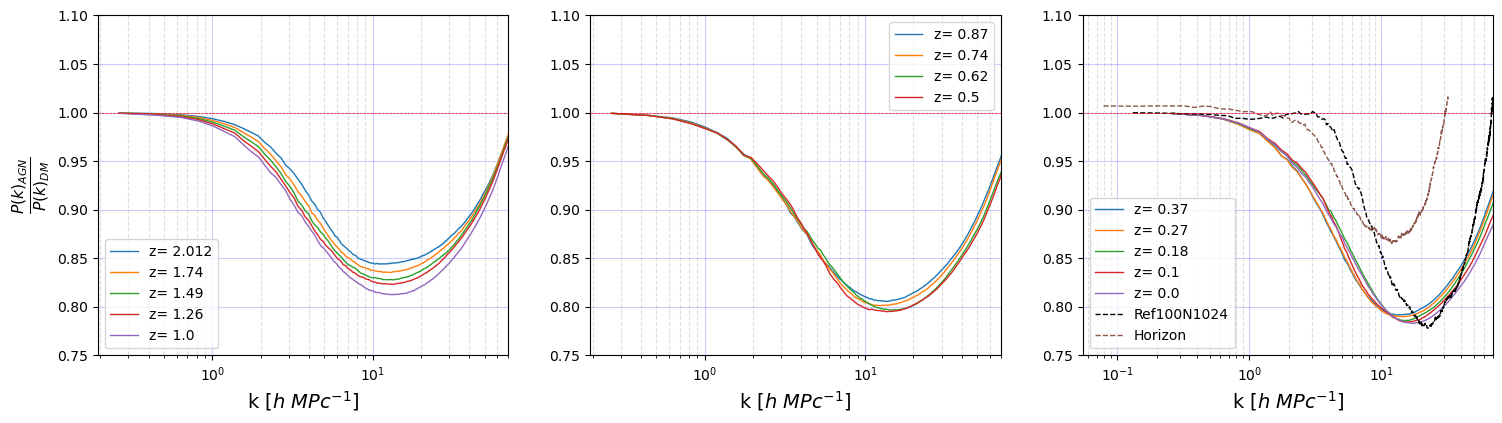

In [14]:
# now we need to plot the suppression or enhancements of all-matter power spectrum w.r.t DM only and for different timesteps

## AGNdT8
fig, ax = plt.subplots(1,3, figsize=(18,4.5), dpi=100)

last_break = 0
ax[0].set_ylabel('$\\frac{P(k)_{AGN}}{P(k)_{DM}}$', fontsize=16)
for i in enumerate(breakpoints):
    for j in range(last_break, i[1]):
        ax[i[0]].plot(Master_Pk[j][0][0][0][:], Master_Pk[j][2][0][1][:]/Master_Pk[j][0][0][1][:], lw=1, label='z= '+str(z_vals[j]))
    if i[0]==2:
        ax[i[0]].plot(ref_pk['all_matter']['k'][:], ref_pk['all_matter']['Pk0'][:]/ref_pk_dm['Pk0'][:], 
                        lw =1, ls='--', c='black', label="Ref100N1024")
        ax[i[0]].plot(h_k_ref, h_del_ref/h_del_ref_dm, label='Horizon', ls='--', lw=1)
    ax[i[0]].axhline(y=1, ls='--', lw=0.5, color='red')
    ax[i[0]].set_xscale('log')
    ax[i[0]].set_xlim(right=70)
    ax[i[0]].set_ylim(0.8, 1.1)
    ax[i[0]].legend()
    ax[i[0]].grid(alpha=0.2, color='blue')
    ax[i[0]].grid(alpha=0.4, which='minor', linestyle='--')
    ax[i[0]].set_xlabel('k [$h~MPc^{-1}$]', fontsize=14)
    last_break = i[1]
# fig.suptitle('AGNdT8')
# fig.subplots_adjust(top=0.93)
plt.savefig("Plots/AGNdT8_Pk_suppression.jpg", bbox_inches='tight', dpi=200)

## AGNdT9
fig, ax = plt.subplots(1,3, figsize=(18,4.5), dpi=100)

last_break = 0
ax[0].set_ylabel('$\\frac{P(k)_{AGN}}{P(k)_{DM}}$', fontsize=16)
for i in enumerate(breakpoints):
    for j in range(last_break, i[1]):
        ax[i[0]].plot(Master_Pk[j][0][1][0][:], Master_Pk[j][2][1][1][:]/Master_Pk[j][0][1][1][:], lw=1, label='z= '+str(z_vals[j]))
    if i[0]==2:
        ax[i[0]].plot(ref_pk['all_matter']['k'][:], ref_pk['all_matter']['Pk0'][:]/ref_pk_dm['Pk0'][:], 
                        lw =1, ls='--', c='black', label="Ref100N1024")
        ax[i[0]].plot(h_k_ref, h_del_ref/h_del_ref_dm, label='Horizon', ls='--', lw=1)
    ax[i[0]].axhline(y=1, ls='--', lw=0.5, color='red')
    ax[i[0]].set_xscale('log')
    ax[i[0]].set_xlim(right=70)
    ax[i[0]].set_ylim(0.75,1.1)
    ax[i[0]].legend()
    ax[i[0]].grid(alpha=0.2, color='blue')
    ax[i[0]].grid(alpha=0.4, which='minor', linestyle='--')
    ax[i[0]].set_xlabel('k [$h~MPc^{-1}$]', fontsize=14)
    last_break = i[1]
# fig.suptitle('AGNdT9')
# fig.subplots_adjust(top=0.93)
plt.savefig("Plots/AGNdT9_Pk_suppression.jpg", bbox_inches='tight', dpi=200)

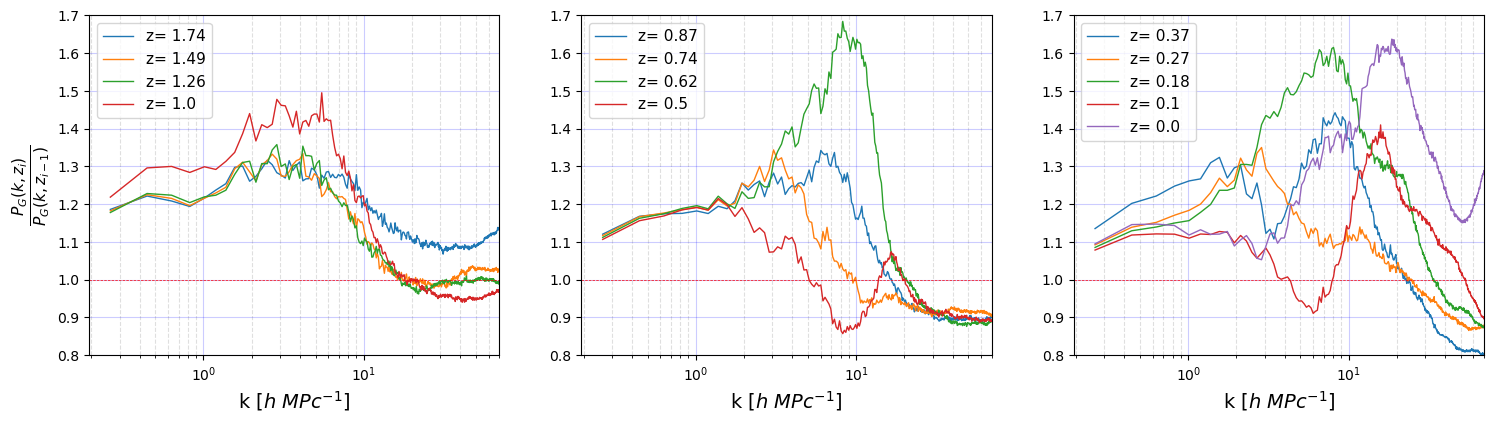

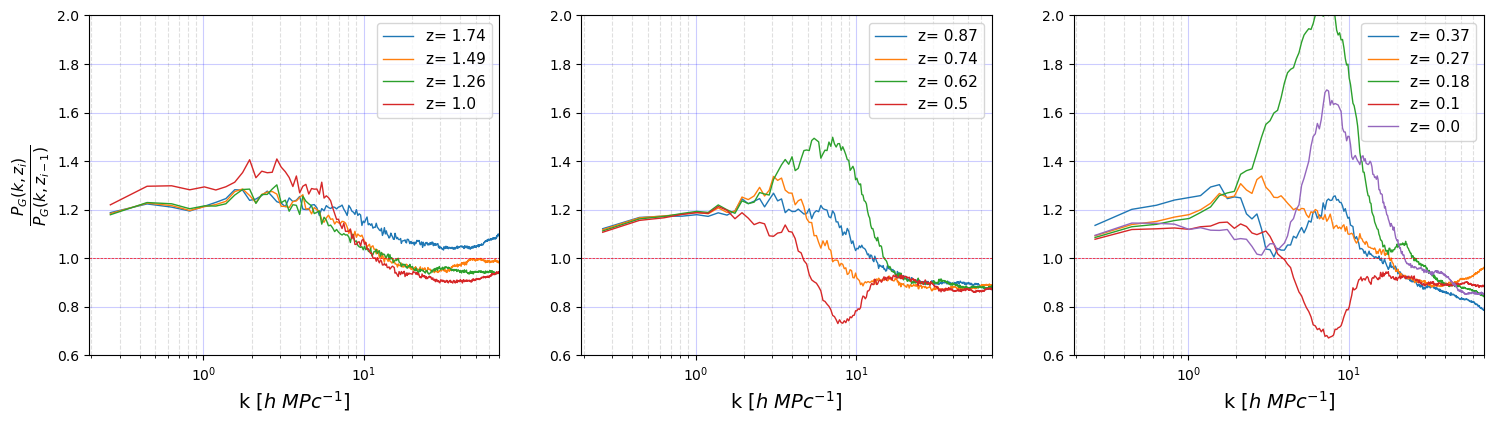

In [18]:
# now we need to plot the suppression or enhancements of gas power spectrum w.r.t DM only and for different timesteps

## AGNdT8
fig, ax = plt.subplots(1,3, figsize=(18,4.5), dpi=100)

last_break = 0
ax[0].set_ylabel('$\\frac{P_G(k, z_i)}{P_G(k, z_{i-1})}$', fontsize=16)
for i in enumerate(breakpoints):
    for j in range(last_break, i[1]):
        if j != 0:
            ax[i[0]].plot(Master_Pk[j][1][0][0][:], Master_Pk[j][1][0][1][:]/Master_Pk[j-1][1][0][1][:], lw=1, label='z= '+str(z_vals[j]))
    # if i[0]==2:
    #     ax[i[0]].plot(ref_pk['all_matter']['k'][:], ref_pk['all_matter']['Pk0'][:]/ref_pk_dm['Pk0'][:], 
    #                     lw =1, ls='--', c='black', label="Ref100N1024")
    #     ax[i[0]].plot(h_k_ref, h_del_ref/h_del_ref_dm, label='Horizon', ls='--', lw=1)
    ax[i[0]].axhline(y=1, ls='--', lw=0.5, color='red')
    ax[i[0]].set_xscale('log')
    ax[i[0]].set_xlim(right=70)
    ax[i[0]].set_ylim(0.8,1.7)
    ax[i[0]].legend(fontsize=11, loc=2)
    ax[i[0]].grid(alpha=0.2, color='blue')
    ax[i[0]].grid(alpha=0.4, which='minor', linestyle='--')
    ax[i[0]].set_xlabel('k [$h~MPc^{-1}$]', fontsize=14)
    last_break = i[1]
# fig.suptitle('AGNdT8')
# fig.subplots_adjust(top=0.93)
plt.savefig("Plots/AGNdT8_Pk_suppression_gas.jpg", bbox_inches='tight', dpi=100)

## AGNdT9
fig, ax = plt.subplots(1,3, figsize=(18,4.5), dpi=100)

last_break = 0
ax[0].set_ylabel('$\\frac{P_G(k, z_i)}{P_G(k, z_{i-1})}$', fontsize=16)
for i in enumerate(breakpoints):
    for j in range(last_break, i[1]):
        if j!=0:
            ax[i[0]].plot(Master_Pk[j][1][1][0][:], Master_Pk[j][1][1][1][:]/Master_Pk[j-1][1][1][1][:], lw=1, label='z= '+str(z_vals[j]))
    # if i[0]==2:
        # ax[i[0]].plot(ref_pk['all_matter']['k'][:], ref_pk['all_matter']['Pk0'][:]/ref_pk_dm['Pk0'][:], 
        #                 lw =1, ls='--', c='black', label="Ref100N1024")
        # ax[i[0]].plot(h_k_ref, h_del_ref/h_del_ref_dm, label='Horizon', ls='--', lw=1)
    ax[i[0]].axhline(y=1, ls='--', lw=0.5, color='red')
    ax[i[0]].set_xscale('log')
    ax[i[0]].set_xlim(right=70)
    ax[i[0]].set_ylim(0.6,2)
    ax[i[0]].legend(fontsize=11)
    ax[i[0]].grid(alpha=0.2, color='blue')
    ax[i[0]].grid(alpha=0.4, which='minor', linestyle='--')
    ax[i[0]].set_xlabel('k [$h~MPc^{-1}$]', fontsize=14)
    last_break = i[1]
# fig.suptitle('AGNdT9')
# fig.subplots_adjust(top=0.93)
plt.savefig("Plots/AGNdT9_Pk_suppression_gas.jpg", bbox_inches='tight', dpi=100)

Text(0, 0.5, '$P(k)$')

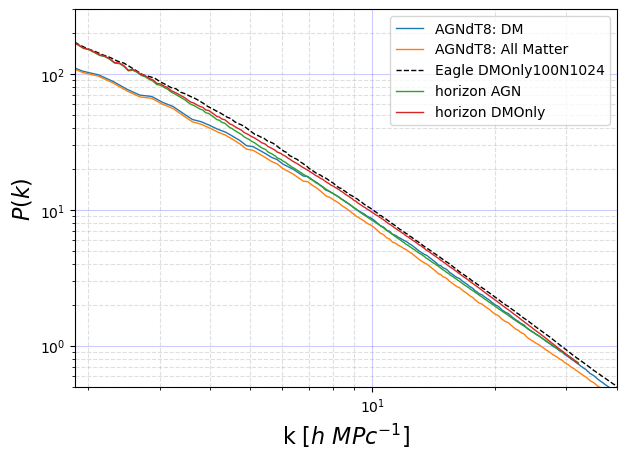

In [14]:
# comparing Pk of AGNdt8 to that of Horizon

plt.figure(figsize=(7,5), dpi=100)

plt.loglog(Master_Pk[-1][0][0][0][:], Master_Pk[-1][0][0][1][:], lw=1, label='AGNdT8: DM')
# plt.loglog(Master_Pk[-1][1][0][0][:-2], Master_Pk[-1][1][0][1][:-2], lw=1, label='Gas')
plt.loglog(Master_Pk[-1][2][0][0][:], Master_Pk[-1][2][0][1][:], lw=1, label='AGNdT8: All Matter')
plt.loglog(ref_pk_dm['k'][:], ref_pk_dm['Pk0'][:], lw =1, color='black', ls='--', label="Eagle DMOnly100N1024")

plt.loglog(h_k_ref, h_Pk_ref, lw=1, label='horizon AGN')
plt.loglog(h_k_ref, h_Pk_ref_dm, lw=1, label='horizon DMOnly')
plt.xlim(left= h2, right=40)
plt.ylim(top = 300, bottom=0.5)
plt.grid(alpha=0.2, color='blue')
plt.grid(alpha=0.4, which='minor', linestyle='--')
plt.legend()

plt.xlabel('k [$h~MPc^{-1}$]', fontsize=16)
plt.ylabel('$P(k)$', fontsize=16)

Text(0, 0.5, '$P(k)$')

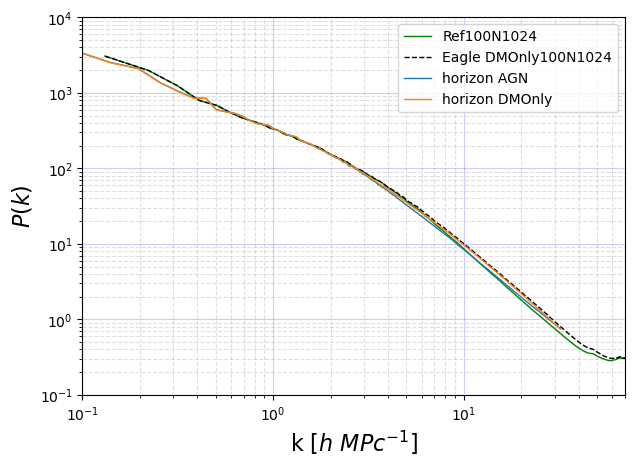

In [15]:
# comparing Pk of Ref100N1024 to that of Horizon
plt.figure(figsize=(7,5), dpi=100)

plt.loglog(ref_pk['all_matter']['k'][:], ref_pk['all_matter']['Pk0'][:], lw =1, color='green', label="Ref100N1024")
plt.loglog(ref_pk_dm['k'][:], ref_pk_dm['Pk0'][:], lw =1, color='black', ls='--', label="Eagle DMOnly100N1024")


plt.loglog(h_k_ref, h_Pk_ref, lw=1, label='horizon AGN')
plt.loglog(h_k_ref, h_Pk_ref_dm, lw=1, label='horizon DMOnly')
plt.xlim(left= 0.1, right=70)
plt.ylim(top = 1e4, bottom=0.1)
plt.grid(alpha=0.2, color='blue')
plt.grid(alpha=0.4, which='minor', linestyle='--')
plt.legend()

plt.xlabel('k [$h~MPc^{-1}$]', fontsize=16)
plt.ylabel('$P(k)$', fontsize=16)

Text(0, 0.5, '$\\frac{P(k)_{AGN}}{P(k)_{DM}}$')

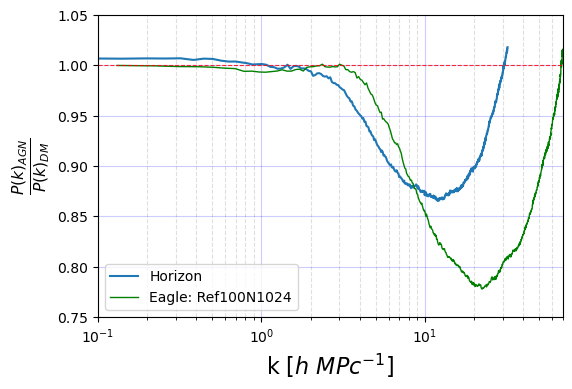

In [16]:
plt.figure(dpi=100)
plt.plot(h_k_ref, h_del_ref/h_del_ref_dm, label='Horizon')
# plt.plot(Master_Pk[-1][0][0][0][:-2], (Master_Pk[-1][2][0][1][:-2])/(Master_Pk[-1][0][0][1][:-2]), lw=1, label='Eagle')

plt.plot(ref_pk['all_matter']['k'][:], ref_pk['all_matter']['Pk0'][:]/ref_pk_dm['Pk0'][:], lw =1,
         color='green', label="Eagle: Ref100N1024")

plt.axhline(y=1, color='red',alpha=0.8, lw=0.8, linestyle='--')
plt.xlim(left=1e-1, right=70)
plt.ylim(top=1.05, bottom=0.75)

plt.grid(alpha=0.2, color='blue')
plt.grid(alpha=0.4, which='minor', linestyle='--')
plt.xscale('log')
plt.legend()

plt.xlabel('k [$h~MPc^{-1}$]', fontsize=16)
plt.ylabel('$\\frac{P(k)_{AGN}}{P(k)_{DM}}$', fontsize=16)

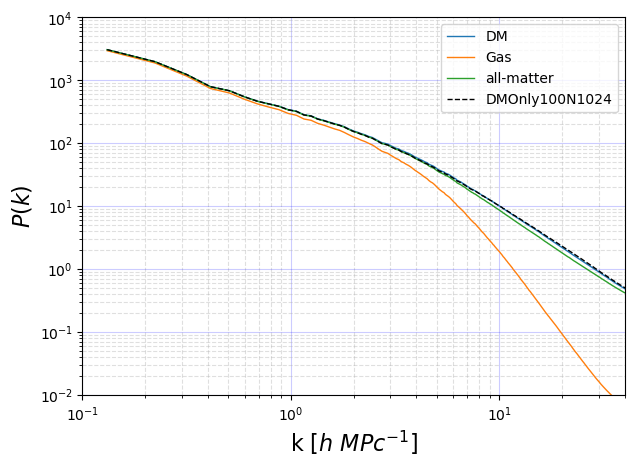

In [17]:
plt.figure(figsize=(7,5), dpi=100)

plt.loglog(ref_pk['DM']['k'][:], ref_pk['DM']['Pk0'][:], lw=1, label="DM")
plt.loglog(ref_pk['gas']['k'][:], ref_pk['gas']['Pk0'][:],lw=1, label="Gas")
plt.loglog(ref_pk['all_matter']['k'][:], ref_pk['all_matter']['Pk0'][:], lw=1,  label="all-matter")
plt.loglog(ref_pk_dm['k'][:], ref_pk_dm['Pk0'][:], lw =1, color='black', ls='--', label="DMOnly100N1024")

plt.xlim(left=0.1, right=40)
plt.ylim(top = 1e4, bottom=0.01)

plt.grid(alpha=0.2, color='blue')
plt.grid(alpha=0.4, which='minor', linestyle='--')

plt.xlabel('k [$h~MPc^{-1}$]', fontsize=16)
plt.ylabel('$P(k)$', fontsize=16)

plt.legend()